# Convergence of PL interpolation

We measure the convergence rate for piecewise linear interpolation of $e^{\sin 7x}$.

In [1]:
using FundamentalsNumericalComputation

In [13]:
f = x -> exp(sin(7*x))
x = (0:10000)/1e4  # sample the difference at many points
n = @. 2^(3:10)
err = zeros(0)
for n in n
    t = (0:n)/n   # interpolation nodes
    p = FNC.plinterp(t,f.(t))
    dif = @.f(x)-p(x)
    push!(err,norm(dif,Inf) )
end

pretty_table((n=n,error=err),backend=:html)

┌───────┬───────────────────────┐
│     n │                 error │
│ Int64 │               Float64 │
├───────┼───────────────────────┤
│     8 │   0.21602990323384974 │
│    16 │   0.06381730414968168 │
│    32 │  0.016038182942837764 │
│    64 │  0.004058789402869412 │
│   128 │ 0.0010155253347479132 │
│   256 │ 0.0002540280995928512 │
│   512 │  6.348972346570392e-5 │
│  1024 │ 1.5876989992058554e-5 │
└───────┴───────────────────────┘


Since we expect convergence that is $O(h^2)=O(n^{-2})$, we use a log-log graph of error and expect a straight line of slope $-2$.

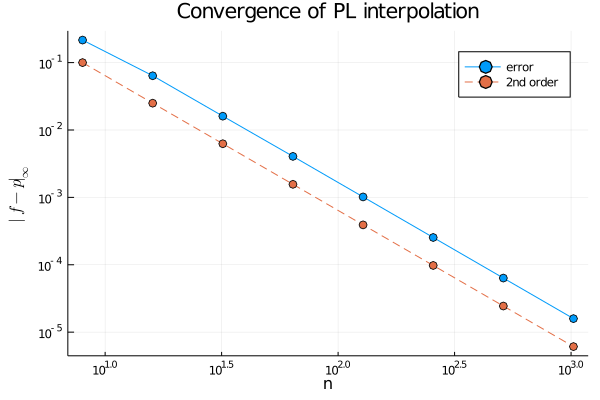

In [14]:
order2 = @. 0.1*(n/n[1])^(-2)

plot(n,[err order2],m=:o,l=[:solid :dash],label=["error" "2nd order"],
    xaxis=(:log10,"n"), yaxis=(:log10,"\$\\| f-p \\|_\\infty\$"),
    title="Convergence of PL interpolation")